In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("../../data/National_education_cost/CP2-remastered.csv")
import warnings
warnings.filterwarnings("ignore")

df.drop("Unnamed: 9", axis=1, inplace=True)
df

,Year,National,Middle States,Midwest,New England,South,Southwest,West,UnivType
0,90-91,910.0,1400.0,1200.0,1360.0,710.0,600.0,410.0,Public Two Year
1,91-92,1170.0,1680.0,1290.0,1750.0,810.0,660.0,510.0,Public Two Year
2,92-93,1120.0,1820.0,1430.0,1870.0,920.0,690.0,620.0,Public Two Year
3,93-94,1250.0,1890.0,1500.0,2110.0,980.0,710.0,770.0,Public Two Year
4,94-95,1310.0,2000.0,1550.0,2200.0,990.0,750.0,780.0,Public Two Year
...,...,...,...,...,...,...,...,...,...
63,19-20,10440.0,11280.0,10970.0,13960.0,9590.0,9980.0,9880.0,Public four Year
64,20-21,10570.0,11330.0,11170.0,14310.0,9650.0,10300.0,10030.0,Public four Year
65,21-22,10750.0,11570.0,11430.0,14520.0,9760.0,10530.0,10120.0,Public four Year
66,22-23,10990.0,11840.0,11790.0,15000.0,9820.0,10660.0,10510.0,Public four Year


In [45]:
df.dtypes

Year              object
National         float64
Middle States    float64
Midwest          float64
New England      float64
South            float64
Southwest        float64
West             float64
UnivType          object
dtype: object

In [46]:
def replace_year(x):
    current = x[:2]
    if current[0] in ["8","9"]: return "19"+current
    else: return "20"+current
df['Year'] = df['Year'].apply(replace_year)

In [47]:
df

,Year,National,Middle States,Midwest,New England,South,Southwest,West,UnivType
0,1990,910.0,1400.0,1200.0,1360.0,710.0,600.0,410.0,Public Two Year
1,1991,1170.0,1680.0,1290.0,1750.0,810.0,660.0,510.0,Public Two Year
2,1992,1120.0,1820.0,1430.0,1870.0,920.0,690.0,620.0,Public Two Year
3,1993,1250.0,1890.0,1500.0,2110.0,980.0,710.0,770.0,Public Two Year
4,1994,1310.0,2000.0,1550.0,2200.0,990.0,750.0,780.0,Public Two Year
...,...,...,...,...,...,...,...,...,...
63,2019,10440.0,11280.0,10970.0,13960.0,9590.0,9980.0,9880.0,Public four Year
64,2020,10570.0,11330.0,11170.0,14310.0,9650.0,10300.0,10030.0,Public four Year
65,2021,10750.0,11570.0,11430.0,14520.0,9760.0,10530.0,10120.0,Public four Year
66,2022,10990.0,11840.0,11790.0,15000.0,9820.0,10660.0,10510.0,Public four Year


In [48]:
df['Year'] = pd.to_datetime(df['Year']).dt.year

In [49]:
df.isna().sum()

Year             0
National         0
Middle States    0
Midwest          0
New England      0
South            0
Southwest        0
West             0
UnivType         0
dtype: int64

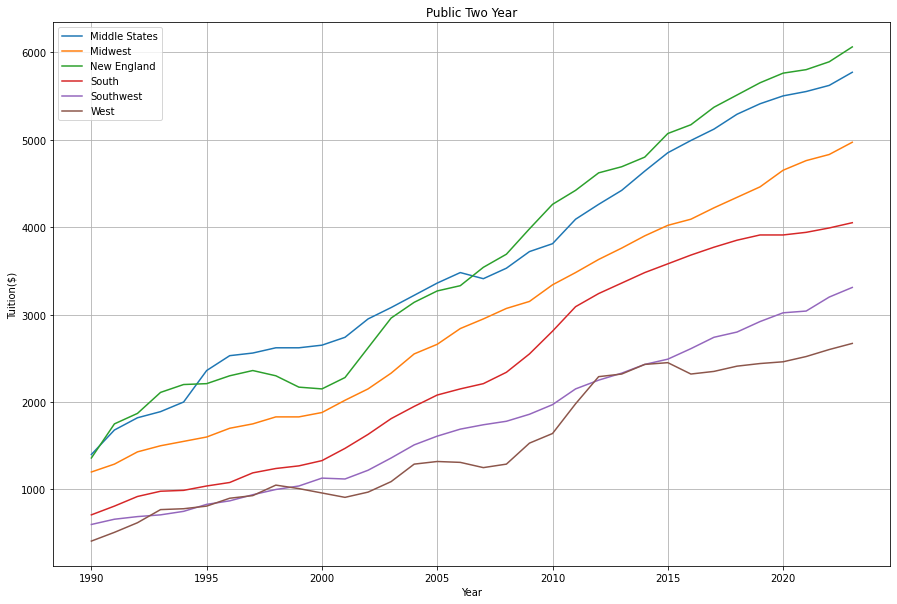

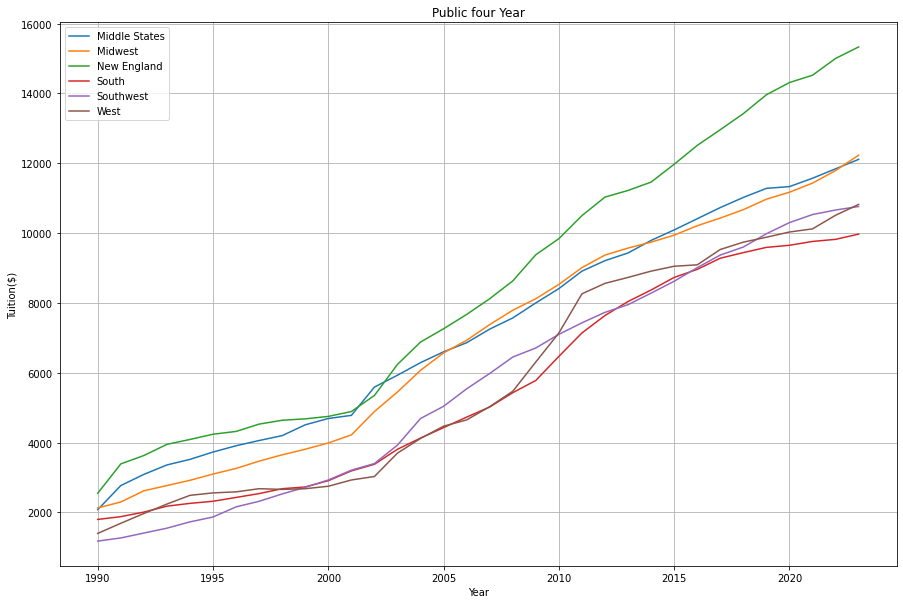

In [50]:
for univ in df['UnivType'].unique():
    temporary = df[df['UnivType']==univ]
    fig, ax = plt.subplots(figsize=(15,10))
    # print(temporary)

    for column in temporary.columns.to_list():
        
        if column not in  ["UnivType", "Year", "National"]:
            # print(column)
            sns.lineplot(data=temporary, x="Year", y=column, label=column)

    plt.xlabel('Year')
    plt.ylabel('Tuition($)')
    plt.title(univ)

    plt.grid()
    plt.legend()
    plt.show()


